# *Import Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# *Define functions*

In [2]:
def load_pickle(file_name):
    infile = open(file_name, 'rb')
    df = pickle.load(infile)
    infile.close()
    return df

# *Load data*
## Dictionary
- CFR = Case Fatality Ratio -> Death / Total Case
- RI = Recovery Index -> Recovered / Total Case
- RLI = Rasio Lacak Isolasi -> (OTG + ODP + Suspect + Probable)/Total Case

In [4]:
df_province_summary = load_pickle('files/df_province_summary')
df_pcr = load_pickle('files/df_pcr')
df_active_case = load_pickle('files/df_active_case')

df_daily_case = load_pickle('files/df_daily_case')
df_daily_death = load_pickle('files/df_daily_death')
df_daily_recovered = load_pickle('files/df_daily_recovered')

df_total_case = load_pickle('files/df_total_case')
df_total_death = load_pickle('files/df_total_death')
df_total_recovered = load_pickle('files/df_total_recovered')

# *Exploratory Data Analysis*
## Metrics
- p0 (Progress to Zero): https://www.medrxiv.org/content/10.1101/2020.05.21.20109298v1.full.pdf+html
- R0 (R-naught): https://www.nytimes.com/2020/04/23/world/europe/coronavirus-R0-explainer.html
- RLI (Rasio Lacak Isolasi): https://kawalcovid19.id/content/1294/serial-data-virus-korona-2-rasio-lacak-isolasi-rli-dan-korelasinya-dengan-kematian-kumulatif

Let's start by seing the proportion of total_case, total_death and total_recovered for provinces in Indonesia. For the sake of better visualization, let's start by seeing 5 provinces with top total case.

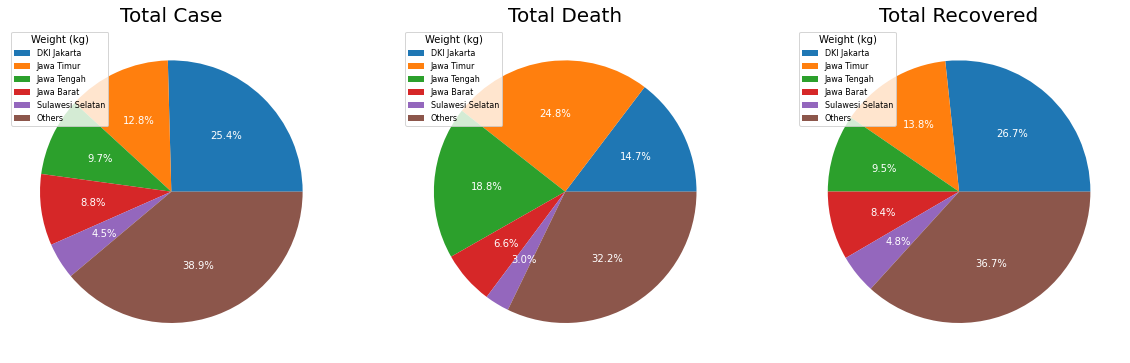

In [5]:
df_province_summary.sort_values(by='Covid19+ Total', ascending=False, inplace=True)

total_case = df_province_summary.iloc[:5,12]
total_case.loc['Others'] = df_province_summary.iloc[5:,12].sum()

total_death = df_province_summary.iloc[:5,15]
total_death.loc['Others'] = df_province_summary.iloc[5:,15].sum()

total_recovered = df_province_summary.iloc[:5,14]
total_recovered.loc['Others'] = df_province_summary.iloc[5:,14].sum()

# --------------------------- PLOT ---------------------------
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
wedges, text, autotexts = ax1.pie(total_case, autopct='%1.1f%%', textprops={'color':"w"})
ax1.set_title('Total Case', fontsize = 20)
ax1.legend(wedges, total_case.index, title="Weight (kg)", loc="upper left", fontsize=8)

wedges, text, autotexts = ax2.pie(total_death, autopct='%1.1f%%', textprops={'color':"w"})
ax2.set_title('Total Death', fontsize = 20)
ax2.legend(wedges, total_death.index, title="Weight (kg)", loc="upper left", fontsize=8)

wedges, text, autotexts = ax3.pie(total_recovered, autopct='%1.1f%%', textprops={'color':"w"})
ax3.set_title('Total Recovered', fontsize = 20)
ax3.legend(wedges, total_recovered.index, title="Weight (kg)", loc="upper left", fontsize=8)

Next, let's see the distribution each category more spesifically.

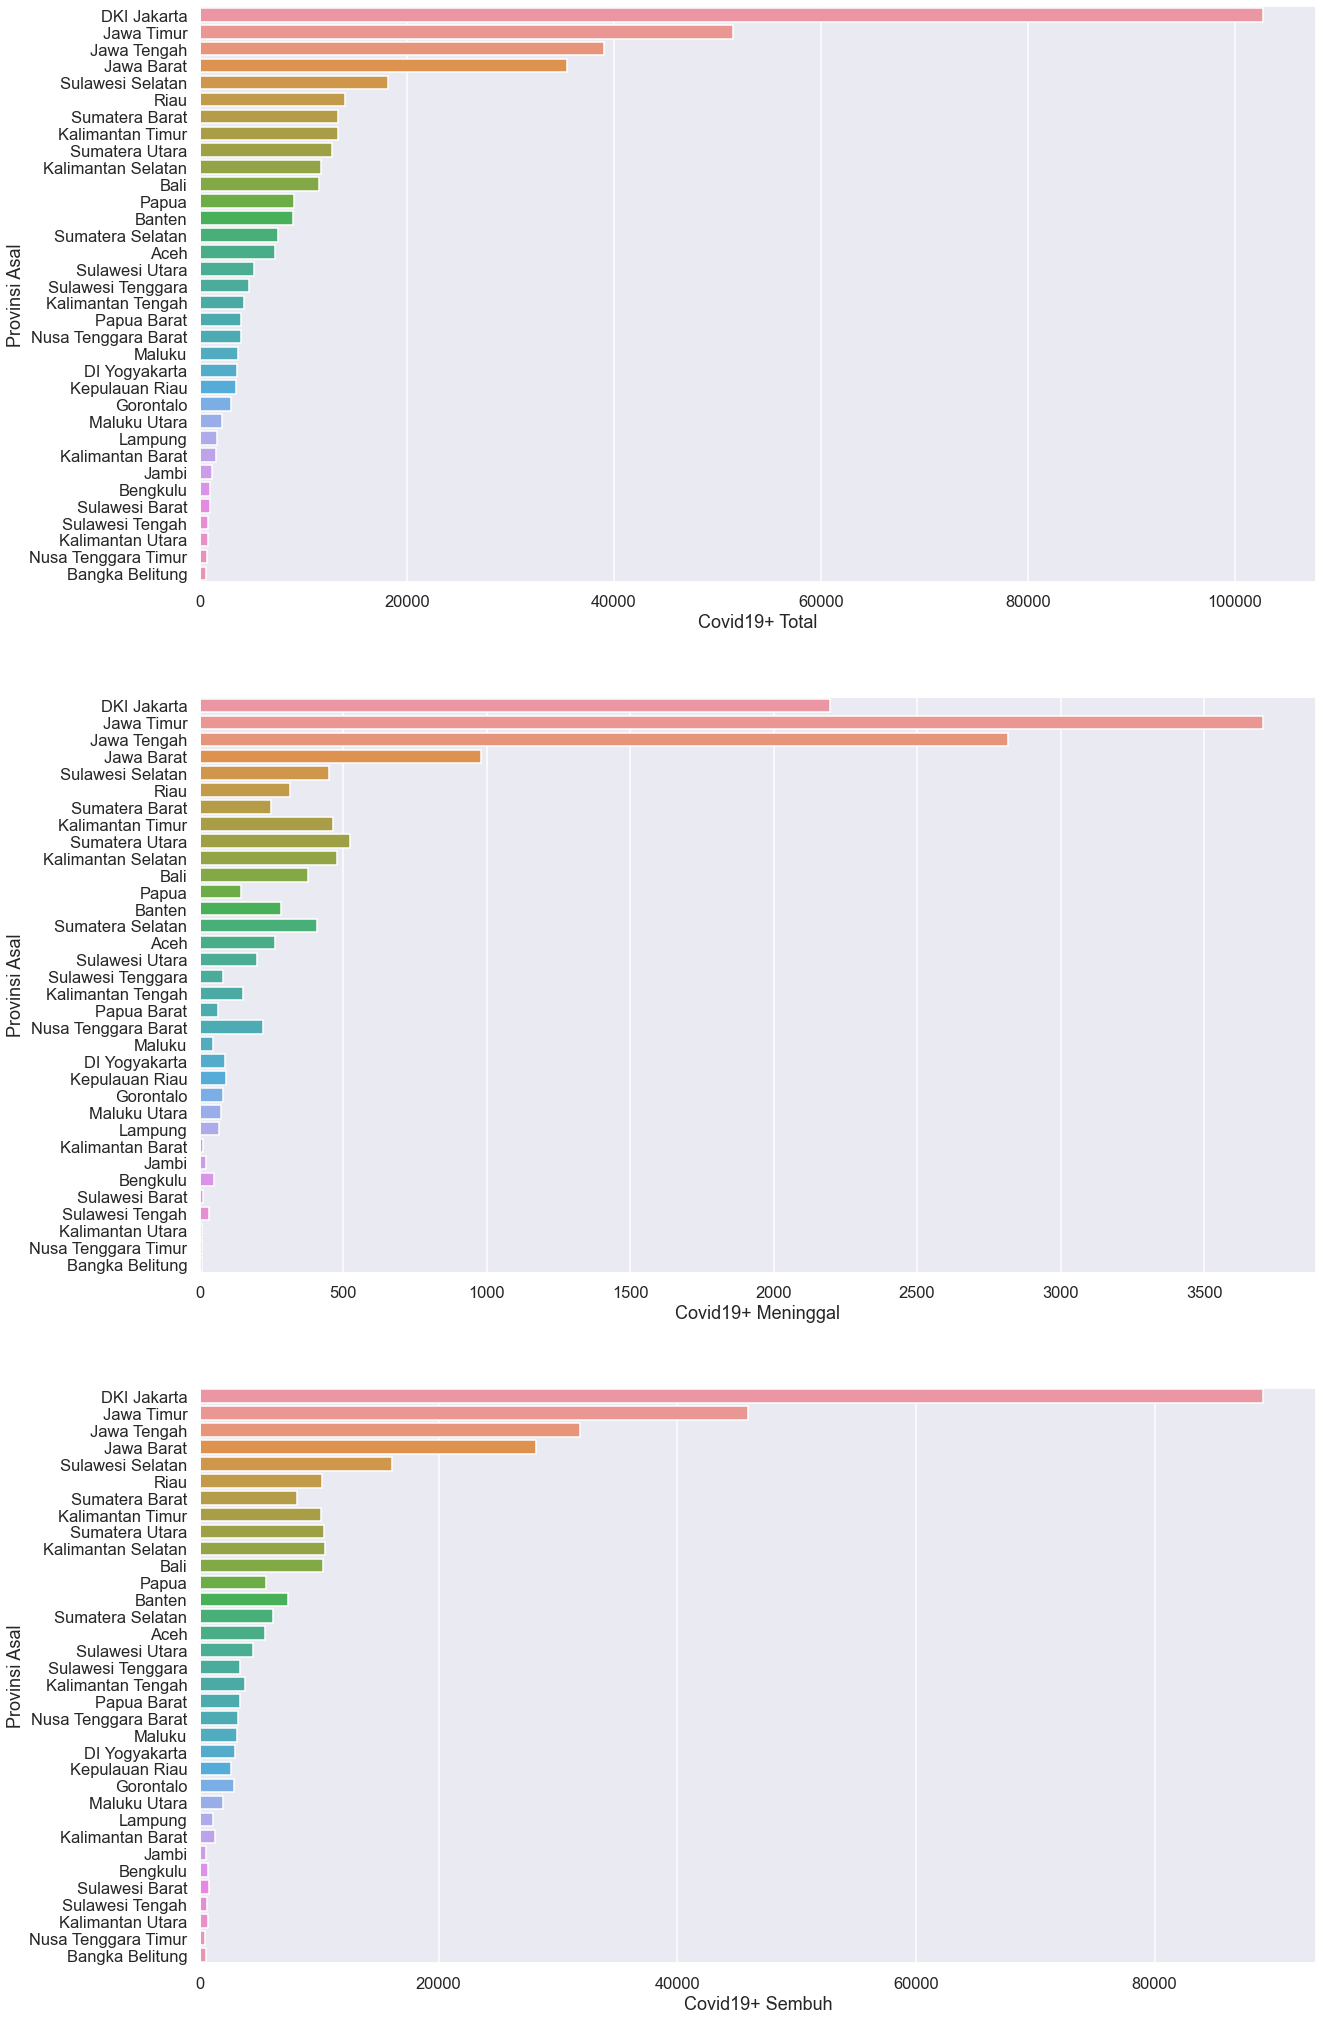

In [89]:
sns.set_context('talk')
sns.set_style('darkgrid')
fig, (ax1,ax2,ax3) = plt.subplots(ncols=1, nrows=3, figsize=(20,36))

sns.barplot(x='Covid19+ Total', y='Provinsi Asal', data=df_province_summary.reset_index(), orient="h", ax=ax1)
ax1.grid(b=True, which='minor', linestyle='--')

sns.barplot(x='Covid19+ Meninggal', y='Provinsi Asal', data=df_province_summary.reset_index(), orient="h", ax=ax2)
ax2.grid(b=True, which='minor', linestyle='--')

sns.barplot(x='Covid19+ Sembuh', y='Provinsi Asal', data=df_province_summary.reset_index(), orient="h", ax=ax3)
ax3.grid(b=True, which='minor', linestyle='--')

- It appears that java island is still the dominant area of virus spreadness. It is shown by 4 province with most cases are in java.
- Spesifically, one fourth of total case came from Jakarta. However, Jakarta seemed better in reducing death cases than East Java and West Java. Jakarta also contributed most recovered cases than any other provinces in Indonesia.

In [88]:
df_province_summary

,ODP Total,PDP,Suspect Total,Probable Total,Rapid Test,Kasus (+) Rapid Test,Tes PCR (Sampel),Tes PCR (Sampel +),Tes PCR (Sampel -),Tes PCR (Kasus Baru),Result (+),Result (-),Covid19+ Total,Covid19+ Dirawat,Covid19+ Sembuh,Covid19+ Meninggal,Covid19+ Isolasi
Provinsi Asal,,,,,,,,,,,,,,,,,
DKI Jakarta,0,0,175710,3913,573373,26321,1.64791e+06,223628,1.42428e+06,1.22484e+06,102678,1.12216e+06,102678,2680,89060,2195,8743
Jawa Timur,0,0,47811,813,1.03332e+06,116684,0,0,0,430686,51506,379180,51506,1025,45950,3704,827
Jawa Tengah,13721,3840,32771,1846,0,0,0,0,0,0,0,0,39036,2326,31857,2817,2036
Jawa Barat,0,0,83061,1595,363033,7351,536891,51669,480735,351173,40403,308743,35447,5931,28171,981,364
Sulawesi Selatan,0,0,11339,237,0,0,0,0,0,0,0,0,18155,668,16124,451,912
Riau,97580,2508,45998,0,63384,868,0,0,0,138142,13996,124146,13996,530,10269,313,2884
Sumatera Barat,10210,1466,458,0,0,0,273386,17469,255917,209158,13375,195783,13375,514,8108,249,4504
Kalimantan Timur,0,0,75835,0,0,0,0,0,0,88627,13348,75279,13348,2708,10175,465,0
Sumatera Utara,0,0,0,0,0,0,53874,12745,0,0,0,0,12745,1845,10376,524,0


In [29]:
titanic = sns.load_dataset("titanic")
titanic
titanic.loc[titanic['class'] == 'Third', ['class']].count()

class    491
dtype: int64